Import the library for modelling

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Model
from keras.optimizers import Adam
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import cv2 as cv
import os
from matplotlib import pyplot as plt

Mounted at /content/drive


In [2]:
!ls "/content/drive/Shareddrives/Capstone_Project/Capstone_datasets/train"

 _annotations.csv  'Bika Ambon'    'Kue Cubit'	  'Pepes Ikan'	 Rendang  'Telur Balado'   Tiramisu
 Bakso		   'Dadar Gulung'  'Nasi Goreng'  'Putu Ayu'	 Sate	  'Tempe Bacem'


In [3]:
import re

train_dir = '/content/drive/Shareddrives/Capstone_Project/Capstone_datasets/train'
valid_dir = '/content/drive/Shareddrives/Capstone_Project/Capstone_datasets/valid'
test_dir = '/content/drive/Shareddrives/Capstone_Project/Capstone_datasets/test'

Showing the distributions of the label in datasets

In [4]:
# def filter_files_by_keyword(dir_path, keyword):
#     pattern = re.compile(fr'.*{re.escape(keyword)}.*\.jpg')
#     matching_files = [filename for filename in os.listdir(dir_path) if pattern.match(filename)]

#     # Menyimpan nama file yang sesuai ke dalam sebuah variabel
#     filtered_files_variable = matching_files

#     # Menampilkan jumlah file yang ada dalam variabel
#     jumlah_file = len(filtered_files_variable)
#     print(f"Jumlah file {keyword}: {jumlah_file}")

#     return filtered_files_variable

def filter_files_by_keyword(dir_path, keyword="."):
    # Get a list of all entries in the directory
    entries = os.listdir(dir_path)

    # Filter out directories based on the keyword
    matching_directories = [entry for entry in entries if os.path.isdir(os.path.join(dir_path, entry)) and keyword in entry]

    print(f'Number of files in {dir_path} with keyword "{keyword}": {len(matching_directories)}')

Nasi_Goreng = filter_files_by_keyword(train_dir, 'Nasi Goreng')
# Sate_Ayam = filter_files_by_keyword(train_dir, 'sate_ayam')
# Telur_Balado = filter_files_by_keyword(train_dir, 'telur_balado')
# Putu_Ayu = filter_files_by_keyword(train_dir, 'putu_ayu')
# Kue_Cubit = filter_files_by_keyword(train_dir, 'kue_cubit')
# Pepes_Ikan = filter_files_by_keyword(train_dir, 'pepes_ikan')
# Tempe_Bacem = filter_files_by_keyword(train_dir, 'tempe_bacem')
# Rendang = filter_files_by_keyword(train_dir, 'rendang')
# Bakso = filter_files_by_keyword(train_dir, 'bakso')
# Bika_Ambon = filter_files_by_keyword(train_dir, 'bika_ambon')
# Dadar_Gulung = filter_files_by_keyword(train_dir, 'dadar_gulung')


Number of files in /content/drive/Shareddrives/Capstone_Project/Capstone_datasets/train with keyword "Nasi Goreng": 1


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Image size and batch size
image_size = (150, 150)
batch_size = 20

# Directory paths
train_dir = '/content/drive/Shareddrives/Capstone_Project/Capstone_Datasets/train'
valid_dir = '/content/drive/Shareddrives/Capstone_Project/Dataset/valid'
test_dir = '/content/drive/Shareddrives/Capstone_Project/Dataset/test'

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 5 == 0:
        return lr * 0.9
    else:
        return lr

lr_callback = LearningRateScheduler(lr_scheduler)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create image data generators with preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model architecture
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(150, 150, 3)))  # Input shape should match target_size
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[lr_callback, early_stopping]
)


Found 6445 images belonging to 11 classes.
Found 416 images belonging to 11 classes.
Epoch 1/20
323/323 [==============================] - 481s 1s/step - loss: 2.9227 - accuracy: 0.2033 - val_loss: 2.8050 - val_accuracy: 0.1082 - lr: 9.0000e-04
Epoch 2/20
 31/323 [=>............................] - ETA: 6:50 - loss: 2.2249 - accuracy: 0.1726

KeyboardInterrupt: ignored

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

img_height, img_width = 32, 32
batch_size = 20

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Model
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),  # Adjusted to 64 filters
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu"),  # Adjusted to 128 filters
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),  # Adjusted to 256 units
    layers.Dropout(0.5),  # Added dropout for regularization
    layers.Dense(23, activation="softmax"),
])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.80):
      print("\nAkurasi telah mencapai 80%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

# Optionally, evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Found 9588 files belonging to 12 classes.
Found 1432 files belonging to 12 classes.
Found 478 files belonging to 12 classes.
Epoch 1/50
480/480 [==============================] - 1900s 4s/step - loss: 1.9383 - accuracy: 0.3471 - val_loss: 1.6458 - val_accuracy: 0.4134
Epoch 2/50
480/480 [==============================] - 65s 135ms/step - loss: 1.4980 - accuracy: 0.4729 - val_loss: 1.5272 - val_accuracy: 0.4763
Epoch 3/50
480/480 [==============================] - 65s 134ms/step - loss: 1.3565 - accuracy: 0.5229 - val_loss: 1.6107 - val_accuracy: 0.4797
Epoch 4/50
480/480 [==============================] - 65s 135ms/step - loss: 1.2428 - accuracy: 0.5677 - val_loss: 1.4907 - val_accuracy: 0.5594
Epoch 5/50
480/480 [==============================] - 68s 141ms/step - loss: 1.1264 - accuracy: 0.6192 - val_loss: 1.3543 - val_accuracy: 0.5936
Epoch 6/50
480/480 [==============================] - 63s 129ms/step - loss: 1.0014 - accuracy: 0.6575 - val_loss: 1.2270 - val_accuracy: 0.6306
Epoch 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         7

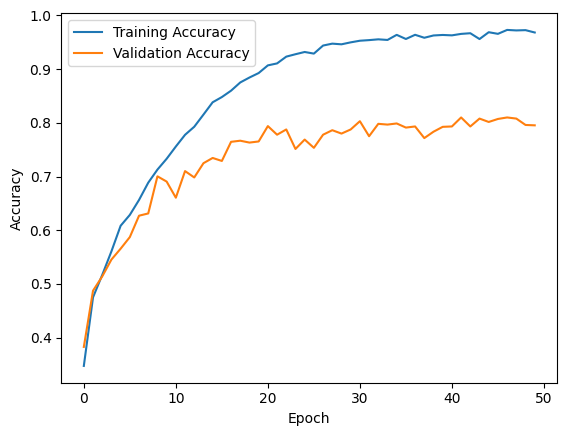

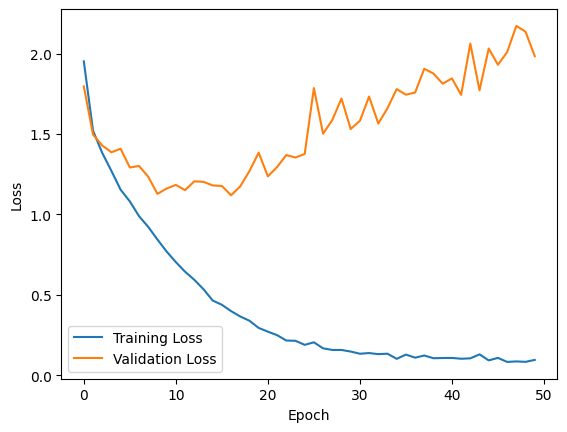

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Image size and batch size
image_size = (224, 224)
batch_size = 32

# Directory paths
train_dir = '/content/drive/Shareddrives/Capstone_Project/Dataset/train'
valid_dir = '/content/drive/Shareddrives/Capstone_Project/Dataset/valid'
test_dir = '/content/drive/Shareddrives/Capstone_Project/Dataset/test'

# Create image data generators with preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

# Create train, validation, and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))  # Adjust class count based on your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)


Found 6453 images belonging to 11 classes.
Found 417 images belonging to 11 classes.
Found 208 images belonging to 11 classes.


KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Image size and batch size
image_size = (224, 224)
batch_size = 32

# Create image data generators with preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

# Assume train_dir is your training data directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))  # Adjust class count based on your dataset

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    verbose=2
)


Found 6445 images belonging to 11 classes.
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
# create reprocessing image generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)


# create train and validation generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# create base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150,3))

# add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(11, activation='softmax')(x)

# create model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze base model layers
for layer in base_model.layers:
    layer.trainable = False




Found 6445 images belonging to 11 classes.
Found 416 images belonging to 11 classes.


In [ ]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=2
)


Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
# save model
model.save('inceptionv3.h5')

# plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# create test generator
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Import the InceptionV3 model

In [ ]:
import urllib

inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
urllib.request.urlretrieve(
inceptionv3, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(
        150, 150, 3
        ), include_top=False, weights=None
    )

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

Add an extra layer for training the datasets and augmant the image

In [ ]:
x = Flatten()(last_output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(21, activation='softmax')(x)
model = Model(inputs=pre_trained_model.input, outputs=output_layer)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

valid_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'
)

Found 10912 images belonging to 21 classes.
Found 2856 images belonging to 21 classes.
Found 1165 images belonging to 21 classes.


Show the summary of the model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

Training the dataset

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
  3/341 [..............................] - ETA: 1:23:22 - loss: 3.1942 - accuracy: 0.0625

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


  5/341 [..............................] - ETA: 1:18:44 - loss: 3.1676 - accuracy: 0.0562

KeyboardInterrupt: ignored

Show the accuracy and the loss of the model

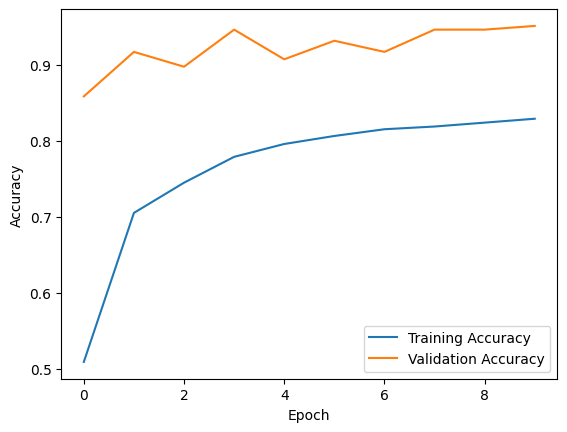

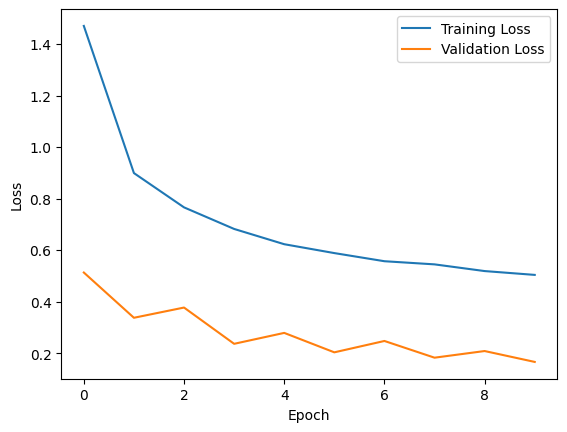

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test the Model

In [ ]:
# Evaluate the model on the test set
test_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

Found 205 images belonging to 11 classes.
7/7 [==============================] - 10s 1s/step - loss: 0.2212 - accuracy: 0.9220
Test accuracy: 0.9219512343406677


In [ ]:
model.evaluate(test_dir)

IndexError: ignored

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()|

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

SyntaxError: ignored